In [ ]:
!pip install tensorflow==2.0.0-alpha0 

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.0.0-alpha0'

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

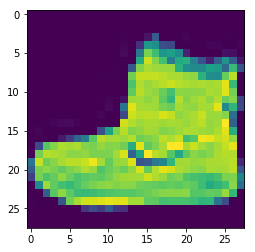

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.show()


In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

ps_strategy = tf.distribute.experimental.ParameterServerStrategy()
with ps_strategy.scope():
    
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4938 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3758 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3357 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3111 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2931 - accuracy: 0.8924


In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2784 - accuracy: 0.8979
Epoch 2/5
 142/1875 [=>............................] - ETA: 10s - loss: 0.2773 - accuracy: 0.8972

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
